In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures, StandardScaler
from sklearn import tree,linear_model,neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":10,"axes.titlesize":24,"axes.labelsize":24}) 

In [9]:
def AnomalousSkewKurt(skew,kurt,sigma):
    if (abs(skew/sigma)>2):
        return True
    if (abs(kurt/sigma)>2):
        return True
    return False

In [10]:
def SckewnessStudy(col):
    skew = col.skew()
    kurt = col.kurt()
    (mu, sigma) = stats.norm.fit(col)
    if (AnomalousSkewKurt(skew,kurt,sigma)):
        sns.distplot(col , fit=stats.norm)
        print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
        print("Skewness: %f" % col.skew())
        print("Kurtosis: %f" % col.kurt())
    return

In [18]:
def Analyze(col):
    print( '\n {}'.format(col.name))
    (mu, sigma) = stats.norm.fit(col)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    print("Skewness: %f" % col.skew())
    print("Kurtosis: %f" % col.kurt())
    return

In [12]:
train = pd.read_csv('TrainClean.csv')
test = pd.read_csv('TestClean.csv')

In [13]:
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = pd.concat((train.loc[:,all_data_index],test.loc[:,all_data_index]))

In [14]:
numerical_cols = [col for col in all_data if all_data[col].dropna().value_counts().index.isin([0,1]).all()==0]
numerical_indx = pd.Index(numerical_cols)
numerical_variables = all_data[numerical_indx]

In [19]:
for var in numerical_variables:
    Analyze(all_data[var])


 Unnamed: 0

 mu = 242476.24 and sigma = 158562.32

Skewness: 0.088450
Kurtosis: -1.268284

 NearestCompetitor

 mu = 8040.32 and sigma = 11632.90

Skewness: 2.691271
Kurtosis: 8.921201

 Region_AreaKM2

 mu = 12381.62 and sigma = 9172.24

Skewness: 0.958608
Kurtosis: 0.351129

 Region_GDP

 mu = 14052.77 and sigma = 2758.38

Skewness: 0.836254
Kurtosis: 2.059574

 Region_PopulationK

 mu = 3852.22 and sigma = 2813.58

Skewness: 0.531212
Kurtosis: -1.397365

 CloudCover

 mu = 5.61 and sigma = 1.66

Skewness: -0.933466
Kurtosis: 0.691152

 Max_Dew_PointC

 mu = 8.25 and sigma = 5.90

Skewness: -0.146122
Kurtosis: -0.617687

 Max_Humidity

 mu = 93.48 and sigma = 7.35

Skewness: -1.301713
Kurtosis: 1.467123

 Max_Sea_Level_PressurehPa

 mu = 1018.57 and sigma = 8.12

Skewness: -0.263819
Kurtosis: 0.901005

 Max_TemperatureC

 mu = 14.34 and sigma = 8.03

Skewness: 0.049516
Kurtosis: -0.669991

 Max_VisibilityKm

 mu = 23.62 and sigma = 9.00

Skewness: -0.704153
Kurtosis: -1.238784

 Ma


 mu = 0.70 and sigma = 1.91

Skewness: 3.764617
Kurtosis: 15.490341


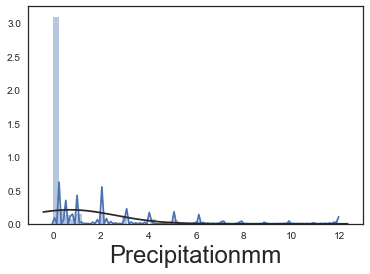

In [20]:
for var in numerical_variables:
    SckewnessStudy(all_data[var])